# Seaborn: -

## Distribution Plots: -

In [34]:
import seaborn as sns
%matplotlib inline

In [6]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


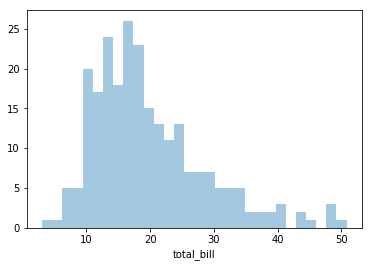

In [26]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

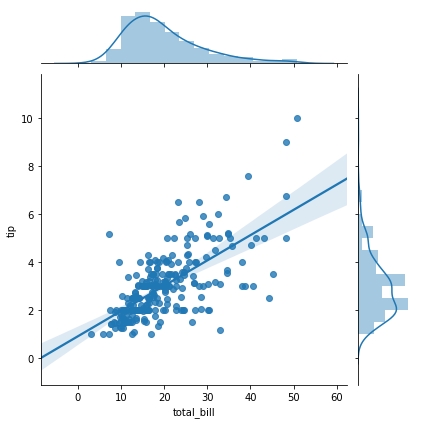

In [13]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

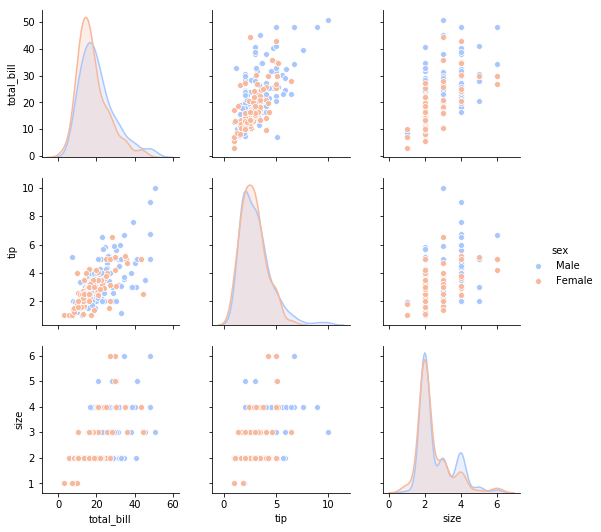

In [17]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

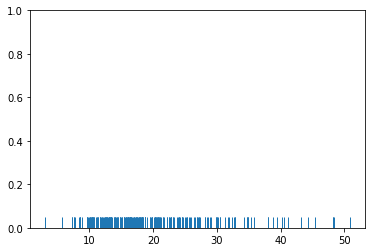

In [19]:
sns.rugplot(tips['total_bill'])

(0, 1)

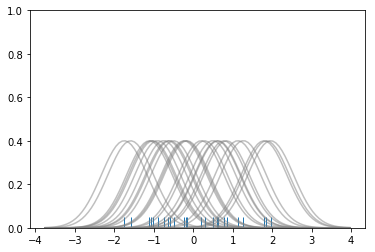

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dataset = np.random.randn(25)
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

url = 'https://en.wikipedia.org/wiki/Kernel_density_estimation#practical_estimation_of_the_bandwidth'
bandwidth = ((4 * dataset.std() ** 5) / (3 * len(dataset))) ** .2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot (x_axis, kernel, color='grey', alpha=0.5)
    
plt.ylim(0, 1)

Text(0.5, 0.98, 'Sum of the Basis Function')

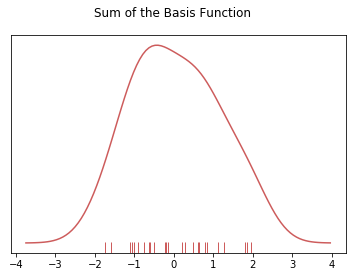

In [32]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset, c = 'indianred')
plt.yticks([])
plt.suptitle("Sum of the Basis Function")

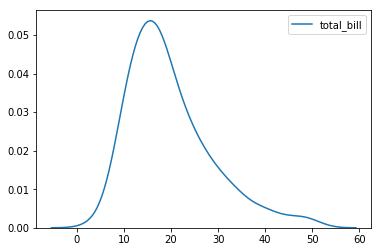

In [35]:
sns.kdeplot(tips['total_bill'])

## Categorical Plots: -

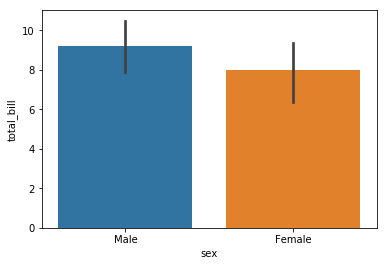

In [39]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.std)

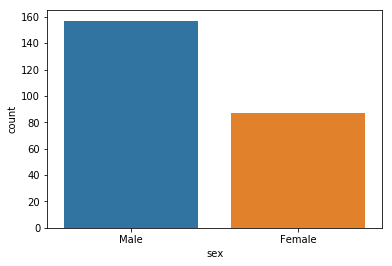

In [41]:
sns.countplot(x = 'sex', data = tips)

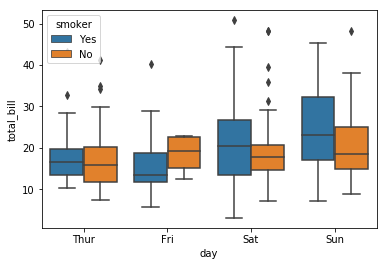

In [45]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker')

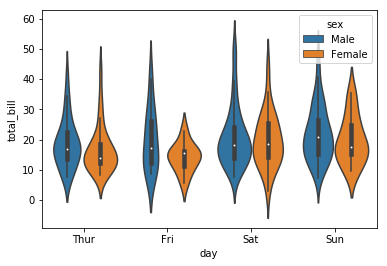

In [48]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex')

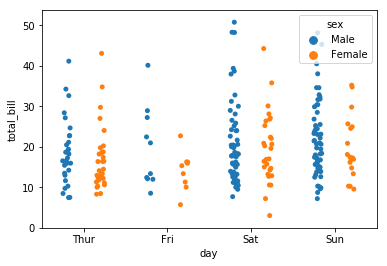

In [53]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = True, hue = 'sex', dodge = True)

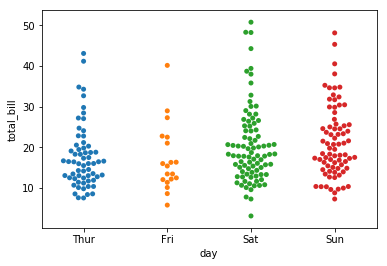

In [55]:
sns.swarmplot(x = 'day', y = 'total_bill', data = tips)

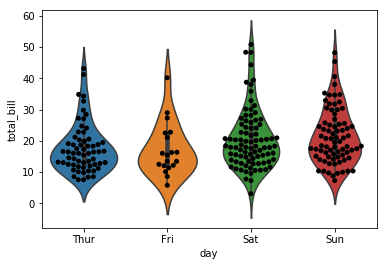

In [57]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = 'black')

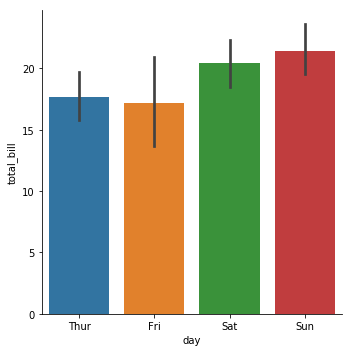

In [62]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'bar') #factorplot is now catplot

## Matrix Plots: -

In [65]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [70]:
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


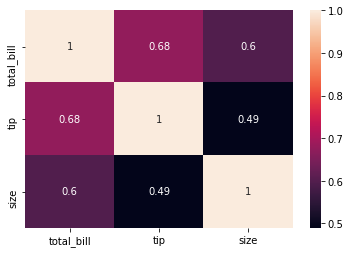

In [72]:
sns.heatmap(tc, annot=True)

In [75]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


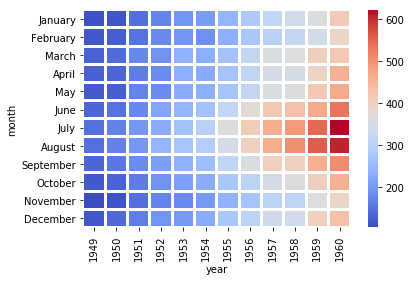

In [81]:
sns.heatmap(fp, cmap='coolwarm', linecolor='white', linewidths=2)

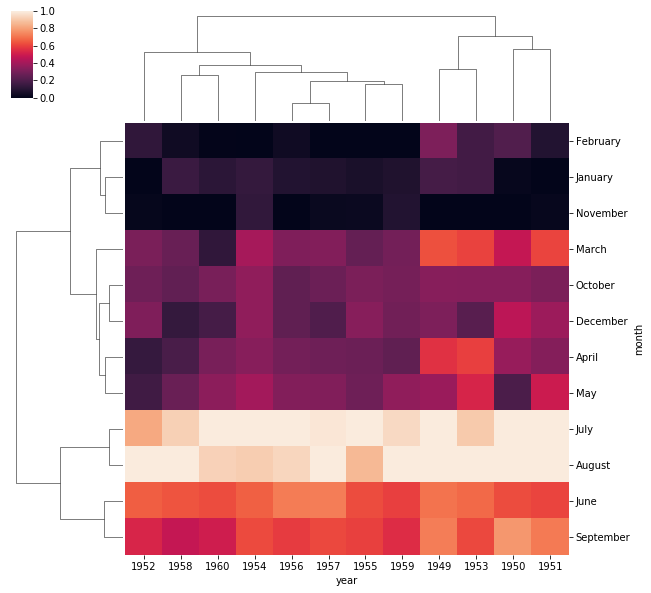

In [85]:
sns.clustermap(fp, standard_scale=1)

## Grids: -

In [86]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [88]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

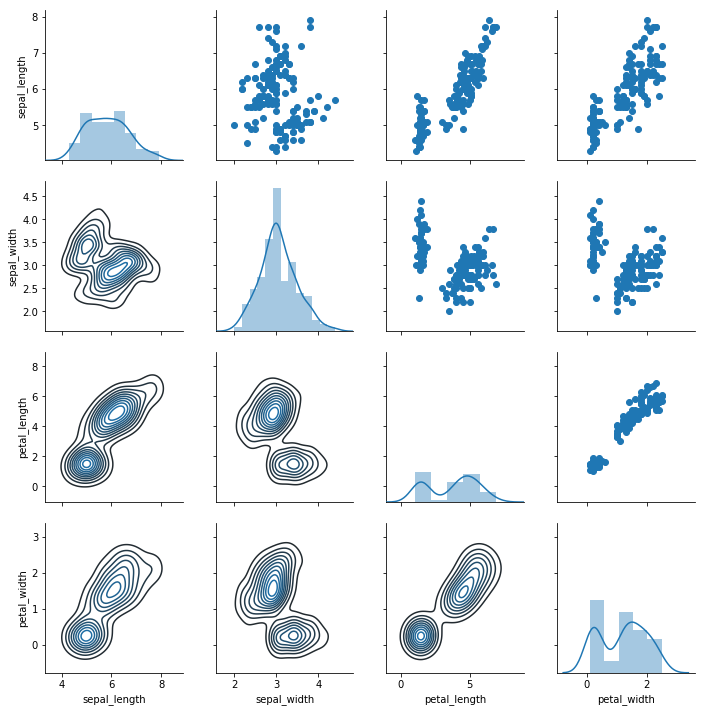

In [91]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

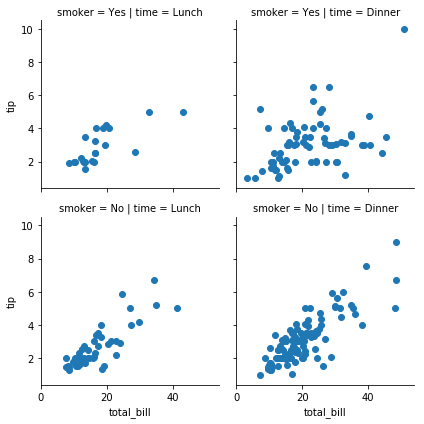

In [97]:
h = sns.FacetGrid(data=tips, col='time', row='smoker')
h.map(sns.distplot, 'total_bill')

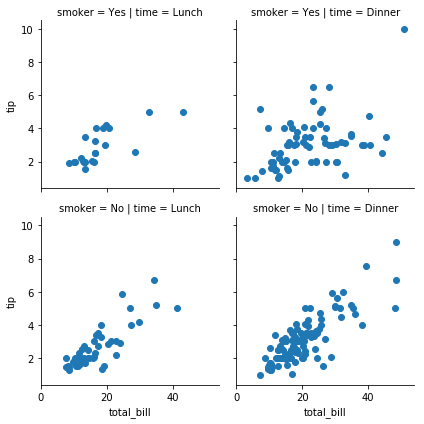

In [101]:
i = sns.FacetGrid(data=tips, col='time', row='smoker')
i.map(plt.scatter, 'total_bill', 'tip')

## Regression Plots: -

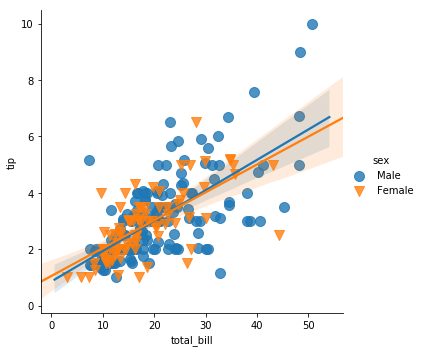

In [106]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'], 
          scatter_kws={'s': 100})

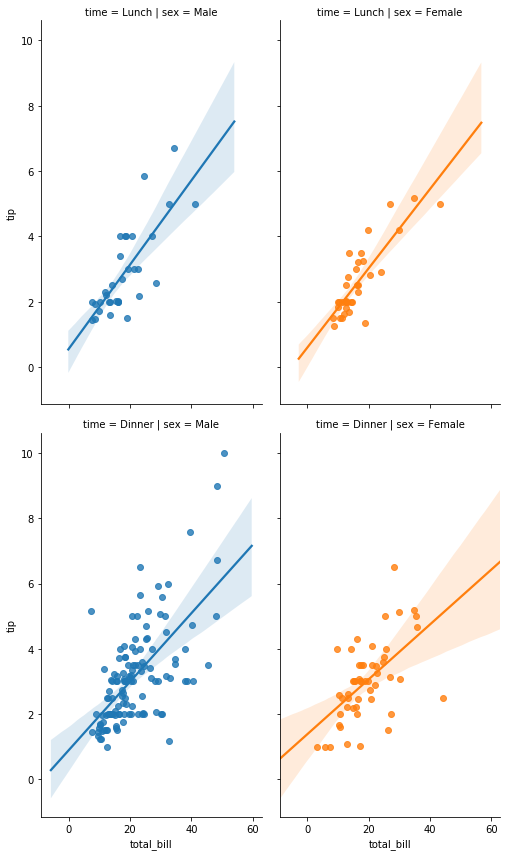

In [121]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', row='time', hue='sex', 
          aspect=0.6, height=6)

## Style and Color: -

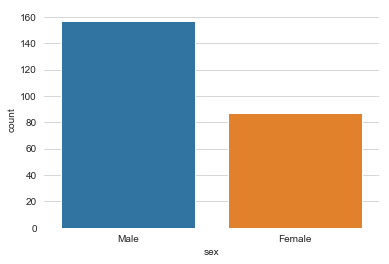

In [130]:
sns.set_style('ticks')
sns.set_style('whitegrid')
sns.countplot(x = 'sex', data = tips)
sns.despine(left=True, bottom=True)

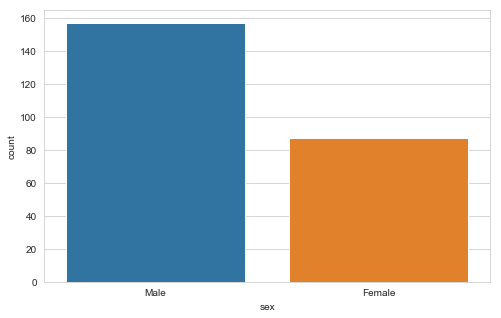

In [136]:
plt.figure(figsize=(8, 5))
sns.countplot(x = 'sex', data = tips)

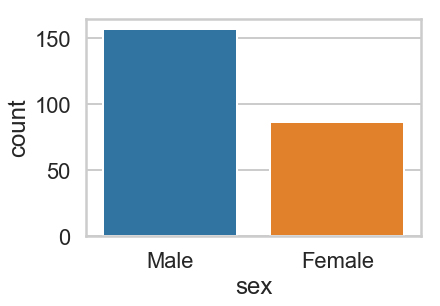

In [142]:
sns.set_context('poster', font_scale=1)
sns.countplot(x = 'sex', data = tips)

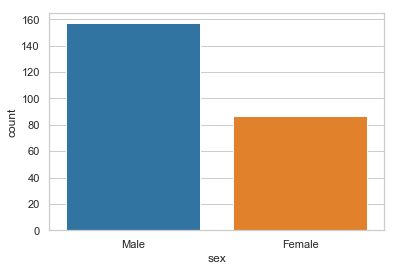

In [144]:
sns.set_context('notebook')
sns.countplot(x = 'sex', data = tips)